# Capstone Project
ADS-599 Summer 2024
Roger Qiu & Shailja Somani

## Setup & Package Imports

In [126]:
# import pandas to handle data
import pandas as pd

# import matplotlib for graphs and visualizations
import matplotlib.pyplot as plt

# import seaborn for Multivariate Graphical Analysis
import seaborn as sns

# set display options to show all columns of tables
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Import Datasets

### Read in and Clean Target Table (Gastric Cancer Mortality Rates Table)

In [127]:
# define the file paths for the target dataset
file_path_male = '/Users/roger.qiu/Documents/other/code/USD/12. Capstone Project/data/IHME_USA_STOMACH_CANCER_COUNTY_RACE_ETHN_2000_2019_MX_2019_MALE_Y2023M06D28.CSV'
file_path_female = '/Users/roger.qiu/Documents/other/code/USD/12. Capstone Project/data/IHME_USA_STOMACH_CANCER_COUNTY_RACE_ETHN_2000_2019_MX_2019_FEMALE_Y2023M06D28.CSV'

#file_path_male = '/Users/shailjasomani/Documents/USD_MS_ADS/ADS_599/Datasets/IHME_USA_STOMACH_CANCER_COUNTY_RACE_ETHN_2000_2019_MX_MALE/IHME_USA_STOMACH_CANCER_COUNTY_RACE_ETHN_2000_2019_MX_2019_MALE_Y2023M06D28.CSV'
#file_path_female = '/Users/shailjasomani/Documents/USD_MS_ADS/ADS_599/Datasets/IHME_USA_STOMACH_CANCER_COUNTY_RACE_ETHN_2000_2019_MX_FEMALE/IHME_USA_STOMACH_CANCER_COUNTY_RACE_ETHN_2000_2019_MX_2019_FEMALE_Y2023M06D28.CSV'

# read in csv file, making sure to keep County FIPS field a string 
df_male = pd.read_csv(file_path_male)

# check the first 5 records
df_male.head()

,measure_id,measure_name,location_id,location_name,fips,race_id,race_name,sex_id,sex_name,age_group_id,age_name,cause_id,cause_name,year,metric_id,metric_name,val,upper,lower
0,1,Deaths,102,United States of America,NaN,1,Total,1,Male,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
1,1,Deaths,102,United States of America,NaN,2,Latino,1,Male,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
2,1,Deaths,102,United States of America,NaN,4,Black,1,Male,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
3,1,Deaths,102,United States of America,NaN,5,White,1,Male,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
4,1,Deaths,102,United States of America,NaN,6,AIAN,1,Male,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0


In [128]:
# read in csv file for female dataset
df_female = pd.read_csv(file_path_female)
df_female.head()

,measure_id,measure_name,location_id,location_name,fips,race_id,race_name,sex_id,sex_name,age_group_id,age_name,cause_id,cause_name,year,metric_id,metric_name,val,upper,lower
0,1,Deaths,102,United States of America,NaN,1,Total,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
1,1,Deaths,102,United States of America,NaN,2,Latino,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
2,1,Deaths,102,United States of America,NaN,4,Black,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
3,1,Deaths,102,United States of America,NaN,5,White,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
4,1,Deaths,102,United States of America,NaN,6,AIAN,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0


In [129]:
# union male and female datasets together so it contains both records
df_combined = pd.concat([df_female, df_male], ignore_index=True)
df_combined.head()

,measure_id,measure_name,location_id,location_name,fips,race_id,race_name,sex_id,sex_name,age_group_id,age_name,cause_id,cause_name,year,metric_id,metric_name,val,upper,lower
0,1,Deaths,102,United States of America,NaN,1,Total,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
1,1,Deaths,102,United States of America,NaN,2,Latino,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
2,1,Deaths,102,United States of America,NaN,4,Black,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
3,1,Deaths,102,United States of America,NaN,5,White,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0
4,1,Deaths,102,United States of America,NaN,6,AIAN,2,Female,28,<1 year,414,Stomach cancer,2019,3,Rate,0.0,0.0,0.0


In [130]:
# check the shape
df_combined.shape

(808920, 19)

In [131]:
# check distinct values, if only one, can drop that field because provider no value
df_combined['cause_name'].unique()

array(['Stomach cancer'], dtype=object)

In [132]:
# select important fields we need
df_select = df_combined[['location_name', 'fips', 'race_name', 'sex_name', 'age_name', 'age_group_id', 'val']]
df_select.head()

,location_name,fips,race_name,sex_name,age_name,age_group_id,val
0,United States of America,NaN,Total,Female,<1 year,28,0.0
1,United States of America,NaN,Latino,Female,<1 year,28,0.0
2,United States of America,NaN,Black,Female,<1 year,28,0.0
3,United States of America,NaN,White,Female,<1 year,28,0.0
4,United States of America,NaN,AIAN,Female,<1 year,28,0.0


In [133]:
df_select.shape

(808920, 7)

In [134]:
# filter out rows where 'fips' is null, we'll need this field populated
df_filtered = df_select.dropna(subset=['fips'])

# also filter out rows where 'race_name' is 'Total' bc that's aggregated data
df_filtered = df_filtered[df_filtered['race_name'] != 'Total']

# similar to filtering out race-aggregated data, filter out age-aggregated data
df_filtered = df_filtered[~df_filtered['age_name'].isin(['All Ages', 'Age-standardized'])]

# filter out rows for aggregated to entire states rather than individual counties
df_filtered = df_filtered[df_filtered['fips'] > 99].reset_index()

df_filtered.head()

,index,location_name,fips,race_name,sex_name,age_name,age_group_id,val
0,253,Autauga County (Alabama),1001.0,Latino,Female,<1 year,28,0.0
1,254,Autauga County (Alabama),1001.0,Black,Female,<1 year,28,0.0
2,255,Autauga County (Alabama),1001.0,White,Female,<1 year,28,0.0
3,256,Autauga County (Alabama),1001.0,AIAN,Female,<1 year,28,NaN
4,257,Autauga County (Alabama),1001.0,API,Female,<1 year,28,NaN


In [135]:
# drop because index field because thats not needed either
df_filtered = df_filtered.drop('index', axis=1)
df_filtered.shape

(600020, 7)

In [136]:
# drop all nulls in target column (val), we not have 277,894 records
df_filtered = df_filtered.dropna(subset=['val'])
df_filtered.shape

(277894, 7)

### Read in SDOH data to be joined via County FIPS Code 

In [137]:
# read in sdoh data to give us additional info
#sdoh = pd.read_excel('/Users/shailjasomani/Documents/USD_MS_ADS/ADS_599/Datasets/SDOH_2019_COUNTY_1_0.xlsx', sheet_name='Data')
sdoh = pd.read_excel('/Users/roger.qiu/Documents/other/code/USD/12. Capstone Project/data/SDOH_2019_COUNTY_1_0.xlsx', sheet_name='Data')
sdoh.head()

,YEAR,COUNTYFIPS,STATEFIPS,STATE,COUNTY,REGION,TERRITORY,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,ACS_PCT_HE

In [138]:
# keep just CountyFIPS column as matching key & all SDOH values (cols beginning with ACS) - will try selecting a key few, as well as PCA on all columns, later
sdoh_filtered = sdoh.drop(columns=['YEAR', 'STATEFIPS', 'STATE', 'COUNTY', 'REGION', 'TERRITORY'])
filtered_columns = ['COUNTYFIPS'] + [col for col in sdoh_filtered.columns if col.startswith('ACS_')]
sdoh_filtered = sdoh_filtered[filtered_columns]
sdoh_filtered.head()

,COUNTYFIPS,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,ACS_PCT_HEALTH_INC_138_199,ACS_PCT_HEALTH_INC_200_399,A

In [139]:
# join to target data on fips
target_sdoh_data = df_filtered.merge(sdoh_filtered, left_on='fips', right_on='COUNTYFIPS', how='left')
target_sdoh_data.head()

,location_name,fips,race_name,sex_name,age_name,age_group_id,val,COUNTYFIPS,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_

In [140]:
# we now have 317 total fields
target_sdoh_data.shape

(277894, 317)

### Read in FIPS to ZCTA Crosswalk
https://data.world/nrippner/fips-to-zip-code-crosswalk

In [141]:
#crosswalk_df = pd.read_csv('/Users/shailjasomani/Documents/USD_MS_ADS/ADS_599/Datasets/fips_zip_x.txt', 
#                           delimiter=',', quotechar='"', skiprows=1, encoding='ISO-8859-1')

# read in the fips to ZCTA crosswalk table
crosswalk_df = pd.read_csv('/Users/roger.qiu/Documents/other/code/USD/12. Capstone Project/data/fips_zip_x.txt', 
                           delimiter=',', quotechar='"', skiprows=1, encoding='ISO-8859-1')

crosswalk_df.head()

,FIPS state,county,ZIP Census Tabulation Area,State Postal Code,cntyname,zipname,"Total Pop, 2010 census",county to zcta5 alloc factor
0,1,1001,36003,AL,Autauga AL,"Autaugaville, AL",1975,0.036
1,1,1001,36006,AL,Autauga AL,"Billingsley, AL",994,0.018
2,1,1001,36022,AL,Autauga AL,"Deatsville, AL",4265,0.078
3,1,1001,36051,AL,Autauga AL,"Marbury, AL",1615,0.030
4,1,1001,36066,AL,Autauga AL,"Prattville, AL",17282,0.317


In [142]:
# keep only crosswalk columns needed: county number and ZCTA
crosswalk_df = crosswalk_df[['county', 'ZIP Census Tabulation Area']]
crosswalk_df.shape

(44139, 2)

### Read in CDC PLACES health measures data (to be joined using ZCTA)
Note: Do not confuse LocationName with the FIPS codes. These are now ZCTAs. One way to check/confirm this is that this LocationName field has 1002, which is a ZCTA code, but not a valid FIPS code.

In [143]:
# read in CDC PLACES health measures data for additional features to use in our analysis

#health_meas = pd.read_csv('/Users/shailjasomani/Documents/USD_MS_ADS/ADS_599/Datasets/PLACES__Local_Data_for_Better_Health__ZCTA_Data_2023_release_20240629.csv')
health_meas = pd.read_csv('/Users/roger.qiu/Documents/other/code/USD/12. Capstone Project/data/PLACES__Local_Data_for_Better_Health__ZCTA_Data_2023_release_20240629.csv')
health_meas.head()

/var/folders/y7/yk0j4d9s2qj2h8b8s_9fjjjr0000gs/T/ipykernel_33344/923207938.py:4: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  health_meas = pd.read_csv('/Users/roger.qiu/Documents/other/code/USD/12. Capstone Project/data/PLACES__Local_Data_for_Better_Health__ZCTA_Data_2023_release_20240629.csv')


,Year,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,Geolocation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text
0,2021,1001,BRFSS,Prevention,Current lack of health insurance among adults ...,%,Crude prevalence,4.1,NaN,NaN,3.4,5.0,16769,POINT (-72.62581515 42.06255509),1001,PREVENT,ACCESS2,CrdPrv,Health Insurance
1,2021,1001,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,Crude prevalence,33.7,NaN,NaN,30.1,37.4,16769,POINT (-72.62581515 42.06255509),1001,HLTHOUT,ARTHRITIS,CrdPrv,Arthritis
2,2021,1001,BRFSS,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,Crude prevalence,15.6,NaN,NaN,13.2,18.2,16769,POINT (-72.62581515 42.06255509),1001,RISKBEH,BINGE,CrdPrv,Binge Drinking
3,2021,1001,BRFSS,Health Outcomes,High blood pressure among adults aged >=18 years,%,Crude prevalence,33.8,NaN,NaN,30.2,37.4,16769,POINT (-72.62581515 42.06255509),1001,HLTHOUT,BPHIGH,CrdPrv,High Blood Pressure
4,2021,1001,BRFSS,Prevention,Taking medicine for high blood pressure contro...,%,Crude prevalence,78.9,NaN,NaN,75.7,81.8,16769,POINT (-72.62581515 42.06255509),1001,PREVENT,BPMED,CrdPrv,Taking BP Medication


In [144]:
# pivot the health measures data so each row is a ZCTA (geographical location) and each column is a metric's % value
pivoted_health_meas = health_meas.pivot_table(index='LocationName', 
                                columns='Short_Question_Text', 
                                values='Data_Value',
                                aggfunc='first') 

# make locationname a column again & remove short_question_text as header
pivoted_health_meas.reset_index(inplace=True)
pivoted_health_meas.columns.name = None
pivoted_health_meas.head()

,LocationName,All Teeth Lost,Annual Checkup,Any Disability,Arthritis,Binge Drinking,COPD,Cancer (except skin),Cervical Cancer Screening,Cholesterol Screening,Chronic Kidney Disease,Cognitive Disability,Colorectal Cancer Screening,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Depression,Diabetes,General Health,Health Insurance,Hearing Disability,High Blood Pressure,High Cholesterol,Independent Living Disability,Mammography,Mental Health,Mobility Disability,Obesity,Physical Health,Physical Inactivity,Self-care Disability,Sleep <7 hours,Stroke,Taking BP Medication,Vision Disability
0,1001,13.3,74.5,31.5,33.7,15.6,7.3,9.1,85.6,89.1,3.3,13.4,76.9,55.9,45.5,6.8,11.4,13.4,74.7,24.7,10.1,14.0,4.1,8.0,33.8,36.0,7.6,82.1,16.3,14.3,31.8,11.3,23.4,3.5,33.5,3.3,78.9,4.2
1,1002,12.4,69.2,26.5,18.9,17.3,5.1,4.9,73.5,78.0,2.2,16.2,77.4,52.9,38.8,4.1,12.1,11.0,68.6,25.8,6.8,12.2,4.7,5.1,20.6,27.9,7.8,79.6,20.2,9.2,23.3,8.9,19.9,2.9,30.1,2.1,70.1,4.4
2,1003,NaN,63.1,35.2,5.5,19.3,3.4,0.7,46.7,56.0,0.9,30.0,53.1,NaN,NaN,1.0,15.4,12.0,55.4,34.8,2.0,13.6,6.9,3.1,9.4,12.6,13.2,77.5,33.8,4.0,22.2,8.5,22.7,2.2,33.1,0.7,19.8,6.4
3,1005,12.1,75.7,24.9,26.4,17.4,6.4,7.4,86.2,88.3,2.7,12.9,81.7,56.5,47.0,5.4,11.7,14.3,74.7,22.8,8.3,12.4,3.8,6.1,28.0,32.8,6.4,82.2,16.2,10.7,31.4,10.0,19.9,2.9,32.5,2.7,74.5,3.4
4,1007,9.2,71.7,21.3,25.2,18.1,5.3,6.9,85.4,89.0,2.4,10.7,79.0,57.4,44.8,4.4,10.7,12.1,75.9,23.0,7.1,10.6,3.3,5.2,24.5,33.1,5.4,79.1,14.7,9.4,25.7,8.9,17.3,2.5,30.0,2.3,73.3,3.0


In [145]:
# Join to crosswalk (note: county and ZCTA here are different, 
    # showing the importance of keeping track of what is FIPS vs. ZCTA codes)
pivoted_health_meas_xwalk = pivoted_health_meas.merge(crosswalk_df, left_on='LocationName', 
                                                      right_on='ZIP Census Tabulation Area', how='left')
pivoted_health_meas_xwalk.head()

,LocationName,All Teeth Lost,Annual Checkup,Any Disability,Arthritis,Binge Drinking,COPD,Cancer (except skin),Cervical Cancer Screening,Cholesterol Screening,Chronic Kidney Disease,Cognitive Disability,Colorectal Cancer Screening,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Depression,Diabetes,General Health,Health Insurance,Hearing Disability,High Blood Pressure,High Cholesterol,Independent Living Disability,Mammography,Mental Health,Mobility Disability,Obesity,Physical Health,Physical Inactivity,Self-care Disability,Sleep <7 hours,Stroke,Taking BP Medication,Vision Disability,county,ZIP Census Tabulation Area
0,1001,13.3,74.5,31.5,33.7,15.6,7.3,9.1,85.6,89.1,3.3,13.4,76.9,55.9,45.5,6.8,11.4,13.4,74.7,24.7,10.1,14.0,4.1,8.0,33.8,36.0,7.6,82.1,16.3,14.3,31.8,11.3,23.4,3.5,33.5,3.3,78.9,4.2,25013,1001
1,1002,12.4,69.2,26.5,18.9,17.3,5.1,4.9,73.5,78.0,2.2,16.2,77.4,52.9,38.8,4.1,12.1,11.0,68.6,25.8,6.8,12.2,4.7,5.1,20.6,27.9,7.8,79.6,20.2,9.2,23.3,8.9,19.9,2.9,30.1,2.1,70.1,4.4,25011,1002
2,1002,12.4,69.2,26.5,18.9,17.3,5.1,4.9,73.5,78.0,2.2,16.2,77.4,52.9,38.8,4.1,12.1,11.0,68.6,25.8,6.8,12.2,4.7,5.1,20.6,27.9,7.8,79.6,20.2,9.2,23.3,8.9,19.9,2.9,30.1,2.1,70.1,4.4,25015,1002
3,1003,NaN,63.1,35.2,5.5,19.3,3.4,0.7,46.7,56.0,0.9,30.0,53.1,NaN,NaN,1.0,15.4,12.0,55.4,34.8,2.0,13.6,6.9,3.1,9.4,12.6,13.2,77.5,33.8,4.0,22.2,8.5,22.7,2.2,33.1,0.7,19.8,6.4,25015,1003
4,1005,12.1,75.7,24.9,26.4,17.4,6.4,7.4,86.2,88.3,2.7,12.9,81.7,56.5,47.0,5.4,11.7,14.3,74.7,22.8,8.3,12.4,3.8,6.1,28.0,32.8,6.4,82.2,16.2,10.7,31.4,10.0,19.9,2.9,32.5,2.7,74.5,3.4,25027,1005


In [146]:
# aggregate to county level taking the average of all metrics. Drop ZCTA columns.
health_meas_FIPS = pivoted_health_meas_xwalk.drop(columns=['LocationName', 'ZIP Census Tabulation Area'])
health_meas_FIPS = health_meas_FIPS.groupby('county').mean().reset_index()
health_meas_FIPS.head()

,county,All Teeth Lost,Annual Checkup,Any Disability,Arthritis,Binge Drinking,COPD,Cancer (except skin),Cervical Cancer Screening,Cholesterol Screening,Chronic Kidney Disease,Cognitive Disability,Colorectal Cancer Screening,Core preventive services for older men,Core preventive services for older women,Coronary Heart Disease,Current Asthma,Current Smoking,Dental Visit,Depression,Diabetes,General Health,Health Insurance,Hearing Disability,High Blood Pressure,High Cholesterol,Independent Living Disability,Mammography,Mental Health,Mobility Disability,Obesity,Physical Health,Physical Inactivity,Self-care Disability,Sleep <7 hours,Stroke,Taking BP Medication,Vision Disability
0,1001,18.660000,76.590000,34.400000,31.190000,14.490000,8.410000,6.380000,83.310000,85.040000,3.260000,16.450000,70.800000,41.840000,39.280000,6.560000,10.830000,20.380000,57.700000,23.110000,13.280000,21.590000,12.260000,6.340000,40.920000,36.050000,10.140000,77.590000,19.060000,18.270000,41.650000,13.820000,33.590000,5.060000,40.040000,3.680000,79.660000,6.320000
1,1003,13.966667,75.329167,33.491667,32.741667,15.445833,8.783333,7.887500,84.316667,87.037500,3.379167,14.062500,71.670833,52.608333,39.195833,7.537500,10.020833,17.083333,63.008333,22.650000,13.075000,18.983333,10.166667,7.591667,39.720833,39.058333,8.512500,77.375000,16.820833,17.654167,39.058333,13.279167,31.612500,4.170833,34.975000,3.625000,81.445833,5.104167
2,1005,24.611111,77.722222,41.622222,33.933333,12.655556,10.977778,6.900000,81.577778,84.077778,4.088889,19.400000,70.011111,38.033333,32.933333,8.544444,11.355556,24.577778,50.066667,22.622222,17.266667,28.211111,16.233333,7.888889,46.866667,39.222222,13.144444,77.866667,19.833333,24.044444,43.155556,16.811111,40.866667,7.244444,41.422222,4.955556,81.566667,9.000000
3,1007,18.066667,73.983333,34.583333,31.291667,15.441667,8.833333,6.641667,82.391667,84.533333,3.116667,16.383333,71.033333,42.508333,37.191667,6.791667,10.366667,21.075000,57.533333,24.066667,12.433333,20.758333,12.241667,6.966667,39.691667,37.675000,9.641667,75.875000,19.091667,17.808333,39.641667,13.891667,34.175000,4.608333,38.666667,3.466667,79.166667,5.691667
4,1009,17.523529,73.652941,34.388235,30.711765,15.270588,9.005882,6.811765,82.364706,83.923529,3.129412,16.564706,70.900000,41.917647,39.305882,7.011765,10.288235,20.688235,58.152941,24.541176,12.047059,20.723529,13.605882,7.364706,37.858824,37.858824,9.582353,75.358824,19.070588,17.623529,38.017647,14.105882,33.047059,4.535294,37.429412,3.370588,77.852941,5.617647


In [147]:
# join our aggregated health measures back to rest of dataset
full_data = target_sdoh_data.merge(health_meas_FIPS, left_on='fips', right_on='county', how='left')
full_data.head()

,location_name,fips,race_name,sex_name,age_name,age_group_id,val,COUNTYFIPS,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_

In [148]:
# make sure its same number of rows as in original target dataset so there are no duplicates
full_data.shape

(277894, 355)

In [149]:
# check number of rows with non-null SDOH values
full_data[pd.notna(full_data['ACS_TOT_POP_WT'])].shape

(276564, 355)

In [150]:
# check number of rows with non-null CDC health metrics values
full_data[pd.notna(full_data['Vision Disability'])].shape

(267634, 355)

## Encode Categorical Columns

In [151]:
# check distinct values in 'race_name' column
full_data['race_name'].unique()

array(['Latino', 'Black', 'White', 'AIAN', 'API'], dtype=object)

In [152]:
# check distinct values in 'age_name' column
full_data['age_name'].unique()

array(['<1 year', '1 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24',
       '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49',
       '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74',
       '75 to 79', '80 to 84', '85 plus'], dtype=object)

In [153]:
# check distinct values in 'age_group_id' column to see if we can easily use this rather than 'age_name'
full_data['age_group_id'].unique()

array([ 28,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  30, 160])

In [154]:
# One-hot encode 'race_name' column into 1/0 cols and drop the first column bc it's redundant
one_hot_encoded = pd.get_dummies(full_data['race_name'], dtype=int, prefix='race_', drop_first=True)

# Concatenate the one-hot encoded columns with the original df & drop original race_name col
# so now we will have a binary field for each race, converting the categorical values into numerical
encoded_data = pd.concat([full_data, one_hot_encoded], axis=1)
encoded_data = encoded_data.drop(columns=['race_name'])
encoded_data.head()

,location_name,fips,sex_name,age_name,age_group_id,val,COUNTYFIPS,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,A

In [155]:
# One-hot encode 'sex_name' column into 1/0 col and drop the first column bc it's redundant
one_hot_encoded = pd.get_dummies(encoded_data['sex_name'], dtype=int, prefix='sex_', drop_first=True)

# Concatenate the one-hot encoded col with the original df & drop original sex_name col
# we now have a single field that tells us whether the record is regarding males or females in the area
encoded_data = pd.concat([encoded_data, one_hot_encoded], axis=1)
encoded_data = encoded_data.drop(columns=['sex_name'])
encoded_data.head()

,location_name,fips,age_name,age_group_id,val,COUNTYFIPS,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,ACS_PCT_HE

In [156]:
# Convert age_name column to numerical - we can keep it in one col bc it's an ordinal variable, not nominal
# Create a mapping of ordinal age values to integers
ordinal_mapping = {
    '<1 year': 0,
    '1 to 4': 1,
    '5 to 9': 2,
    '10 to 14': 3,
    '15 to 19': 4,
    '20 to 24': 5,
    '25 to 29': 6,
    '30 to 34': 7,
    '35 to 39': 8,
    '40 to 44': 9,
    '45 to 49': 10,
    '50 to 54': 11,
    '55 to 59': 12,
    '60 to 64': 13,
    '65 to 69': 14,
    '70 to 74': 15,
    '75 to 79': 16,
    '80 to 84': 17,
    '85 plus': 18
}

# Apply the mapping to the 'age_name' column
# so we now have a single field for the age group for that record, thats values range from 0 (babies) to 18 (elderly)
encoded_data['age_category'] = encoded_data['age_name'].map(ordinal_mapping)
encoded_data.head()

,location_name,fips,age_name,age_group_id,val,COUNTYFIPS,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,ACS_PCT_HE

In [157]:
# drop all unnecessary fields besides target ('val') & features
encoded_data = encoded_data.drop(columns=['location_name', 'fips', 'age_name', 
                                          'age_group_id', 'COUNTYFIPS'])
encoded_data.head()

,val,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,ACS_PCT_HEALTH_INC_138_199,ACS_PCT_HEALTH_INC_200_399,ACS_PCT_

In [158]:
# rename the field from 'val' to 'target' to be more informative
encoded_data.rename(columns={'val': 'target'}, inplace=True)

### Add county and states names for more description

In [159]:
# read in FIPS county number to county names mapping to get names of county and state

fips_county_names = pd.read_csv('/Users/roger.qiu/Documents/other/code/USD/12. Capstone Project/data/US_FIPS_Codes.csv', skiprows=1)
fips_county_names.head()

,State,County Name,FIPS State,FIPS County
0,Alabama,Autauga,1,1
1,Alabama,Baldwin,1,3
2,Alabama,Barbour,1,5
3,Alabama,Bibb,1,7
4,Alabama,Blount,1,9


In [165]:
# make sure FIPS State has 2 digits, so if only 1 digit, then add a 0 to the beginning
fips_county_names['FIPS State'] = fips_county_names['FIPS State'].apply(lambda x: str(x).zfill(2))

# make sure FIPS County has 3 digits, so if only 1 digit, then add two 0's to the beginning
fips_county_names['FIPS County'] = fips_county_names['FIPS County'].apply(lambda x: str(x).zfill(3))

# concat the two fields into one called fips_state_county, we will use this for the join to our main table
fips_county_names['fips_state_county'] = fips_county_names['FIPS State'] + fips_county_names['FIPS County']

# drop the state and county numbers nows, no longer needed 
fips_county_names = fips_county_names.drop(columns=['FIPS State', 'FIPS County'])

fips_county_names.head()

,State,County Name,fips_state_county
0,Alabama,Autauga,01001
1,Alabama,Baldwin,01003
2,Alabama,Barbour,01005
3,Alabama,Bibb,01007
4,Alabama,Blount,01009


In [162]:
# make sure both columns to be merged are of the same type (string)

# convert the 'county' field in our main table to numeric, converting any nulls to NaN. This is to prevent errors during the join.
encoded_data['county'] = pd.to_numeric(encoded_data['county'], errors='coerce')

# convert the 'county' field to int, ignoring NaNs, then to string with leading zeros, this is to fix the county number format from 1001.0 to 01001
encoded_data['county'] = encoded_data['county'].apply(lambda x: '{:05.0f}'.format(x) if pd.notnull(x) else None)
fips_county_names['fips_state_county'] = fips_county_names['fips_state_county'].astype(str)

encoded_data['county'].head()

0    01001
1    01001
2    01001
3    01003
4    01003
Name: county, dtype: object

In [163]:
# now the join key in both tables are the same
fips_county_names['fips_state_county'].head()

0    01001
1    01003
2    01005
3    01007
4    01009
Name: fips_state_county, dtype: object

In [166]:
# join the fips county names to our main table on county numbers to get the names of the counties and the states
final_data = pd.merge(encoded_data, fips_county_names, left_on='county', right_on='fips_state_county', how='left')

final_data.head()

,target,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,ACS_PCT_HEALTH_INC_138_199,ACS_PCT_HEALTH_INC_200_399,ACS_P

In [167]:
# drop the join key, does not provide additional info for us
final_data = final_data.drop(columns=['fips_state_county'])

In [168]:
# now that we have our cleaned and transformed dataset, write out as a csv to current folder for EDA
final_data.to_csv('encoded_data.csv', index=False)

# EDA

In [169]:
# read in dataset for EDA
df = pd.read_csv('encoded_data.csv')
df.head()

,target,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,ACS_TOT_CIVIL_VET_POP_ABOVE25,ACS_TOT_OWN_CHILD_BELOW17,ACS_TOT_WORKER_NWFH,ACS_TOT_WORKER_HH,ACS_TOT_CIVILIAN_LABOR,ACS_TOT_CIVIL_EMPLOY_POP,ACS_TOT_POP_POV,ACS_TOT_CIVIL_NONINST_POP_POV,ACS_TOT_CIVIL_POP_POV,ACS_TOT_GRANDCHILDREN_GP,ACS_TOT_HU,ACS_TOT_HH,ACS_AVG_HH_SIZE,ACS_TOT_CIVIL_NONINST_POP,ACS_TOT_CIVIL_VET_POP,ACS_PCT_CHILD_DISAB,ACS_PCT_DISABLE,ACS_PCT_NONVET_DISABLE_18_64,ACS_PCT_VET_DISABLE_18_64,ACS_PCT_MALE,ACS_PCT_FEMALE,ACS_PCT_CTZ_US_BORN,ACS_PCT_CTZ_NONUS_BORN,ACS_PCT_FOREIGN_BORN,ACS_PCT_NON_CITIZEN,ACS_PCT_CTZ_NATURALIZED,ACS_PCT_CTZ_ABOVE18,ACS_PCT_NONCTN_1990,ACS_PCT_NONCTN_1999,ACS_PCT_NONCTN_2000,ACS_PCT_NONCTN_2010,ACS_PCT_API_LANG,ACS_PCT_ENGL_NOT_ALL,ACS_PCT_ENGL_NOT_WELL,ACS_PCT_ENGL_VERY_WELL,ACS_PCT_ENGL_WELL,ACS_PCT_ENGLISH,ACS_PCT_HH_LIMIT_ENGLISH,ACS_PCT_OTH_EURP,ACS_PCT_OTH_LANG,ACS_PCT_SPANISH,ACS_PCT_VET,ACS_PCT_GULFWAR_1990_2001,ACS_PCT_GULFWAR_2001,ACS_PCT_GULFWAR_VIETNAM,ACS_PCT_VIETNAM,ACS_MEDIAN_AGE,ACS_MEDIAN_AGE_MALE,ACS_MEDIAN_AGE_FEMALE,ACS_PCT_AGE_0_4,ACS_PCT_AGE_5_9,ACS_PCT_AGE_10_14,ACS_PCT_AGE_15_17,ACS_PCT_AGE_0_17,ACS_PCT_AGE_18_29,ACS_PCT_AGE_18_44,ACS_PCT_AGE_30_44,ACS_PCT_AGE_45_64,ACS_PCT_AGE_50_64,ACS_PCT_AGE_ABOVE65,ACS_PCT_AGE_ABOVE80,ACS_PCT_AIAN,ACS_PCT_AIAN_FEMALE,ACS_PCT_AIAN_MALE,ACS_PCT_AIAN_NONHISP,ACS_PCT_ASIAN,ACS_PCT_ASIAN_FEMALE,ACS_PCT_ASIAN_MALE,ACS_PCT_ASIAN_NONHISP,ACS_PCT_BLACK,ACS_PCT_BLACK_FEMALE,ACS_PCT_BLACK_MALE,ACS_PCT_BLACK_NONHISP,ACS_PCT_HISP_FEMALE,ACS_PCT_HISP_MALE,ACS_PCT_HISPANIC,ACS_PCT_MULT_RACE,ACS_PCT_MULT_RACE_FEMALE,ACS_PCT_MULT_RACE_MALE,ACS_PCT_MULT_RACE_NONHISP,ACS_PCT_NHPI,ACS_PCT_NHPI_FEMALE,ACS_PCT_NHPI_MALE,ACS_PCT_NHPI_NONHISP,ACS_PCT_OTHER_FEMALE,ACS_PCT_OTHER_MALE,ACS_PCT_OTHER_NONHISP,ACS_PCT_OTHER_RACE,ACS_PCT_WHITE,ACS_PCT_WHITE_FEMALE,ACS_PCT_WHITE_MALE,ACS_PCT_WHITE_NONHISP,ACS_PCT_HOUSEHOLDER_WHITE,ACS_PCT_HOUSEHOLDER_BLACK,ACS_PCT_HOUSEHOLDER_AIAN,ACS_PCT_HOUSEHOLDER_ASIAN,ACS_PCT_HOUSEHOLDER_NHPI,ACS_PCT_HOUSEHOLDER_OTHER,ACS_PCT_HOUSEHOLDER_MULT,ACS_PCT_AIAN_COMB,ACS_PCT_ASIAN_COMB,ACS_PCT_BLACK_COMB,ACS_PCT_NHPI_COMB,ACS_PCT_WHITE_COMB,ACS_PCT_CHILD_1FAM,ACS_PCT_CHILDREN_GRANDPARENT,ACS_PCT_GRANDP_RESPS_NO_P,ACS_PCT_GRANDP_RESPS_P,ACS_PCT_GRANDP_NO_RESPS,ACS_PCT_HH_KID_1PRNT,ACS_PCT_HH_NO_COMP_DEV,ACS_PCT_HH_SMARTPHONE,ACS_PCT_HH_SMARTPHONE_ONLY,ACS_PCT_HH_TABLET,ACS_PCT_HH_TABLET_ONLY,ACS_PCT_HH_PC,ACS_PCT_HH_PC_ONLY,ACS_PCT_HH_OTHER_COMP,ACS_PCT_HH_OTHER_COMP_ONLY,ACS_PCT_HH_INTERNET,ACS_PCT_HH_INTERNET_NO_SUBS,ACS_PCT_HH_BROADBAND,ACS_PCT_HH_BROADBAND_ONLY,ACS_PCT_HH_BROADBAND_ANY,ACS_PCT_HH_CELLULAR,ACS_PCT_HH_CELLULAR_ONLY,ACS_PCT_HH_NO_INTERNET,ACS_PCT_HH_SAT_INTERNET,ACS_PCT_HH_DIAL_INTERNET_ONLY,ACS_PCT_DIVORCED_F,ACS_PCT_DIVORCED_M,ACS_PCT_MARRIED_SP_AB_F,ACS_PCT_MARRIED_SP_AB_M,ACS_PCT_MARRIED_SP_PR_F,ACS_PCT_MARRIED_SP_PR_M,ACS_PCT_NVR_MARRIED_F,ACS_PCT_NVR_MARRIED_M,ACS_PCT_WIDOWED_F,ACS_PCT_WIDOWED_M,ACS_PCT_POP_SAME_SEX_UNMRD_P,ACS_PCT_POP_SAME_SEX_SPOUSE,ACS_PCT_ADMIN,ACS_PCT_ART,ACS_PCT_CONSTRUCT,ACS_PCT_EDUC,ACS_PCT_FINANCE,ACS_PCT_GOVT,ACS_PCT_INFORM,ACS_PCT_MANUFACT,ACS_PCT_NATURE,ACS_PCT_OTHER,ACS_PCT_PROFESS,ACS_PCT_PVT_NONPROFIT,ACS_PCT_PVT_PROFIT,ACS_PCT_RETAIL,ACS_PCT_TRANSPORT,ACS_PCT_WHOLESALE,ACS_PCT_WORK_RES_F,ACS_PCT_WORK_RES_M,ACS_PCT_EMPLOYED,ACS_PCT_UNEMPLOY,ACS_PCT_NOT_LABOR,ACS_PCT_VET_UNEMPL_18_64,ACS_PCT_VET_LABOR_FORCE_18_64,ACS_PCT_ARMED_FORCES,ACS_GINI_INDEX,ACS_MDN_GRNDPRNT_NO_PRNT_INC,ACS_MDN_GRNDPRNT_INC,ACS_MEDIAN_HH_INC_AIAN,ACS_MEDIAN_HH_INC_ASIAN,ACS_MEDIAN_HH_INC_BLACK,ACS_MEDIAN_HH_INC_HISP,ACS_MEDIAN_HH_INC_MULTI,ACS_MEDIAN_HH_INC_NHPI,ACS_MEDIAN_HH_INC_OTHER,ACS_MEDIAN_HH_INC_WHITE,ACS_MEDIAN_HH_INC,ACS_MEDIAN_INC_F,ACS_MEDIAN_INC_M,ACS_MEDIAN_NONVET_INC,ACS_MEDIAN_VET_INC,ACS_PCT_INC50_ABOVE65,ACS_PCT_INC50_BELOW17,ACS_PCT_HEALTH_INC_BELOW137,ACS_PCT_HEALTH_INC_138_199,ACS_PCT_HEALTH_INC_200_399,ACS_P

In [170]:
# out dataset has 277,894 records and 356 fields
df.shape

(277894, 356)

### target field analysis

In [171]:
# check nulls in our target field, 0 is good
df['target'].isnull().sum()

0

#### Univariate Non-Graphical Analysis

In [172]:
# use describe to get statistical summary on our target field, targetues are all very small
df['target'].describe()

count    2.778940e+05
mean     9.633472e-05
std      1.780172e-04
min      0.000000e+00
25%      3.230454e-07
50%      1.477765e-05
75%      1.040915e-04
max      2.538237e-03
Name: target, dtype: float64

In [173]:
# check the median of this field, also a very small number
df['target'].median()

1.4777645465246001e-05

In [174]:
# check the skew and kurtosis of the field to measure the asymmetry and peak of the distribution
skewness = df['target'].skew()
kurtosis = df['target'].kurt()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

Skewness: 2.9245090269465104, Kurtosis: 11.146841229870112


#### Univariate Graphical Analysis

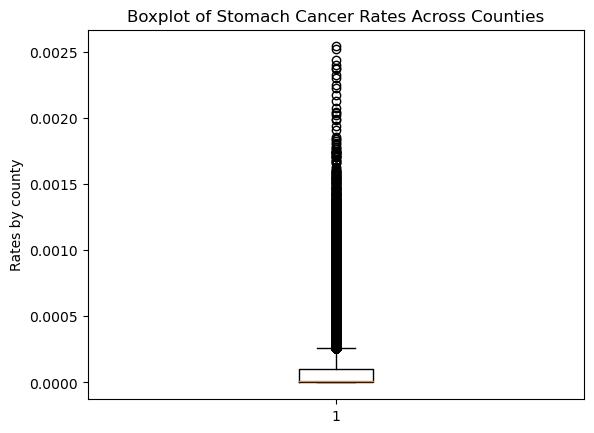

In [175]:
# create a boxplot using matplotlib of distribution of target
# can see the majority of values are 0 or near 0 with values going as high as .0025
plt.boxplot(df['target'])
plt.title('Boxplot of Stomach Cancer Rates Across Counties')
plt.ylabel('Rates by county')
plt.show()

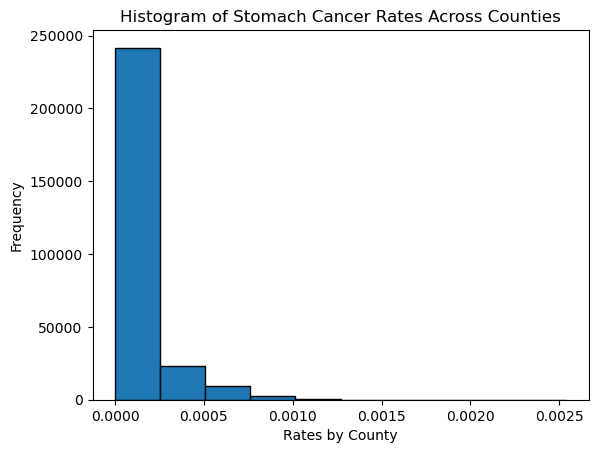

In [176]:
# also use a histogram to check values, just a different way of looking at the distribution
plt.hist(df['target'], bins=10, edgecolor='k')
plt.title('Histogram of Stomach Cancer Rates Across Counties')
plt.xlabel('Rates by County')
plt.ylabel('Frequency')
plt.show()

#### Multivariate Non-Graphical and Graphical Analysis

In [177]:
# use a correlation matrix to check the correlation of target and a few other fields
# this can tell us if there is a relationship between certain features
correlation_matrix = df[['target','county','sex__Male','age_category','Obesity','High Cholesterol','Binge Drinking','Depression','Sleep <7 hours']].corr()
correlation_matrix

,target,county,sex__Male,age_category,Obesity,High Cholesterol,Binge Drinking,Depression,Sleep <7 hours
target,1.000000,-3.065013e-03,1.463941e-01,6.871581e-01,1.473754e-02,-9.898467e-04,-1.232488e-02,1.458329e-02,3.850956e-02
county,-0.003065,1.000000e+00,1.598458e-14,1.142176e-14,7.340307e-02,9.842960e-02,1.305797e-01,1.703953e-01,-3.978830e-02
sex__Male,0.146394,1.598458e-14,1.000000e+00,3.986525e-15,3.329176e-14,7.059473e-14,-6.032097e-14,-3.708220e-14,9.554646e-14
age_category,0.687158,1.142176e-14,3.986525e-15,1.000000e+00,9.656130e-16,-1.479538e-15,-8.959597e-16,-2.097891e-16,1.028066e-15
Obesity,0.014738,7.340307e-02,3.329176e-14,9.656130e-16,1.000000e+00,4.780113e-01,-3.767194e-01,2.427502e-01,5.818803e-01
High Cholesterol,-0.000990,9.842960e-02,7.059473e-14,-1.479538e-15,4.780113e-01,1.000000e+00,-4.823024e-01,1.783094e-01,3.005593e-01
Binge Drinking,-0.012325,1.305797e-01,-6.032097e-14,-8.959597e-16,-3.767194e-01,-4.823024e-01,1.000000e+00,-2.493531e-01,-4.748911e-01
Depression,0.014583,1.703953e-01,-3.708220e-14,-2.097891e-16,2.427502e-01,1.783094e-01,-2.493531e-01,1.000000e+00,3.137476e-01
Sleep <7 hours,0.038510,-3.978830e-02,9.554646e-14,1.028066e-15,5.818803e-01,3.005593e-01,-4.748911e-01,3.137476e-01,1.000000e+00


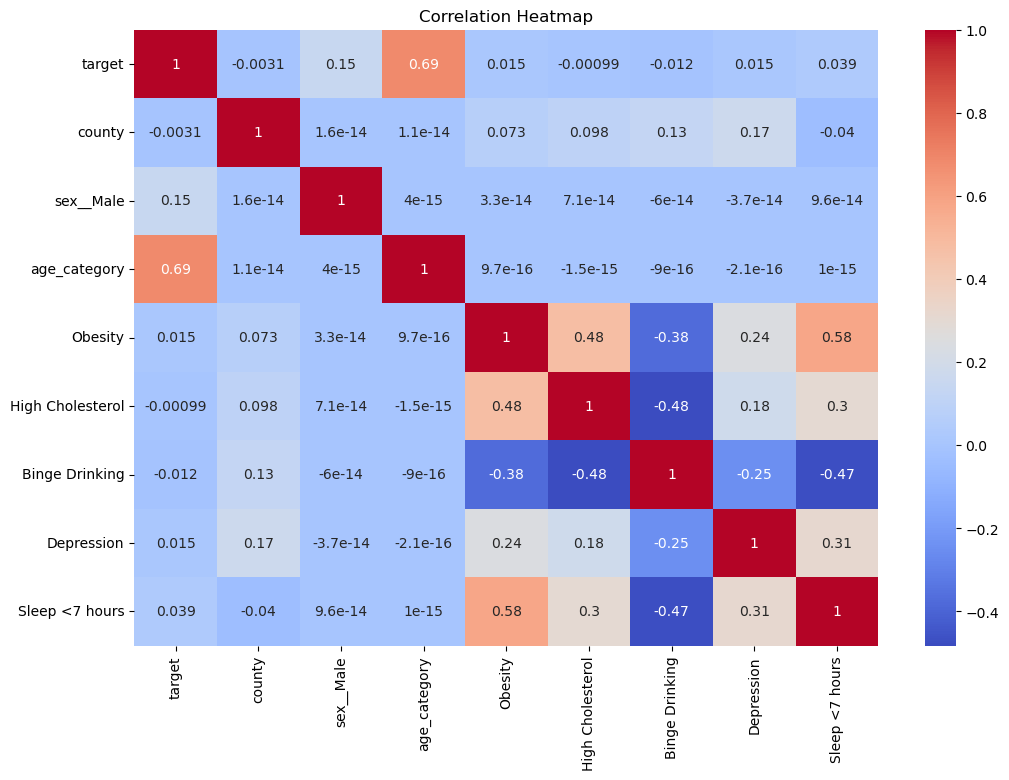

In [178]:
# use seaborn for correlation heatmap, can be easier for us to see any patterns
plt.figure(figsize=(12, 8))  # adjust the width and height so its larger
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# there seems to be a strong positive correlation with Age as well as sex compare to a few other fields

### check distribution of other fields from target table

In [179]:
# lets take a look at some other important fields from out target dataset
df[['race__API', 'race__Black', 'race__Latino', 'race__White', 'sex__Male', 'age_category']].head()

,race__API,race__Black,race__Latino,race__White,sex__Male,age_category
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [180]:
# temporarily adding in 'American indian' as a race column based on of all the other 4 races are 0
df['race__AIAN'] = ((df['race__API'] == 0) & 
                     (df['race__Black'] == 0) & 
                     (df['race__Latino'] == 0) & 
                     (df['race__White'] == 0)).astype(int)

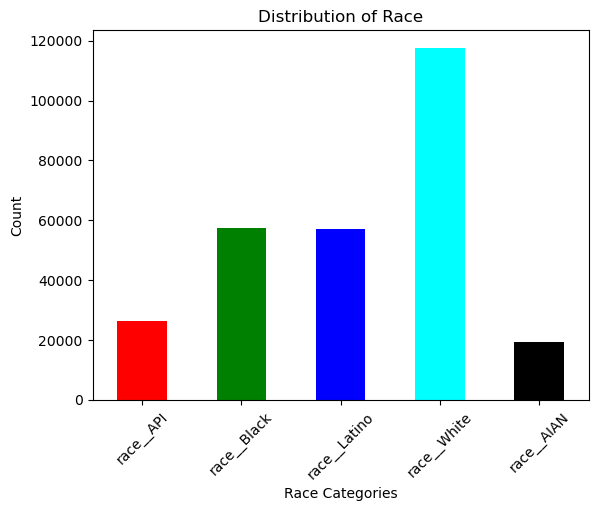

In [181]:
# check distribution of race using a barchart

# get the 5 race fields
race_columns = ['race__API', 'race__Black', 'race__Latino', 'race__White', 'race__AIAN']

# sum the values in each race field to get the total counts for each race
race_counts = df[race_columns].sum()

# create a bar chart for the races to compare distribution of our dataset
race_counts.plot(kind='bar', color=['red', 'green', 'blue', 'cyan', 'black'])
plt.title('Distribution of Race')
plt.xlabel('Race Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate the category labels for better readability
plt.show()

# we can see majority is white, followed by latino and black, then asians and finally, american indians

In [182]:
# drop the AIAN field again to decrease multicollinearity
df = df.drop(columns=['race__AIAN'])

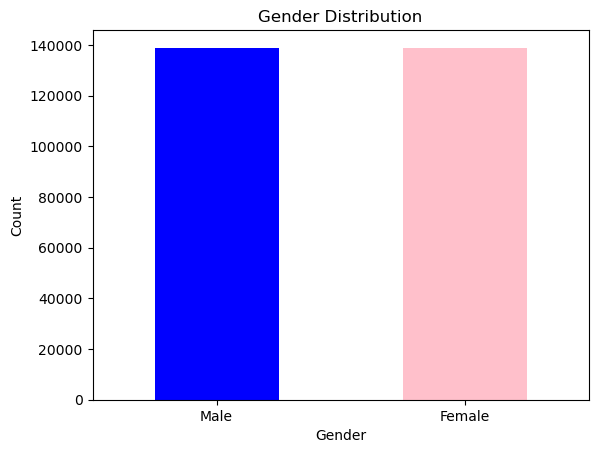

In [183]:
# check distribution of gender using barchart

# get male and female counts
gender_counts = df['sex__Male'].value_counts()

# if 'sex__Male' only includes '1' then Male, else Female
gender_counts.index = ['Male', 'Female']

# create a bar chart for gender
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# we can see it is equally distributed in our dataset

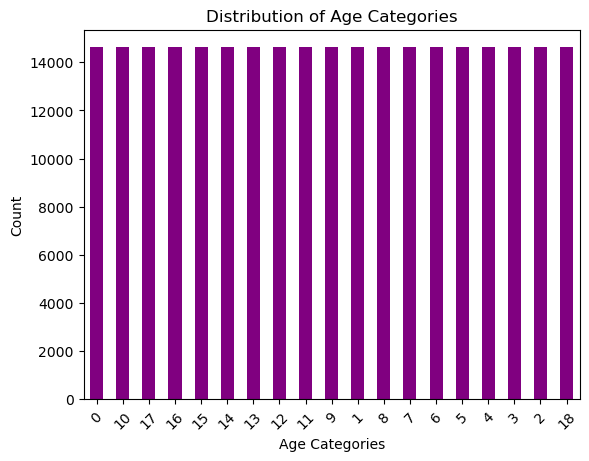

In [184]:
# check distribution of age using barchart

# count the values in each age category
age_category_counts = df['age_category'].value_counts()

# create a bar chart for age categories
age_category_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# we can see that age is also equally distributed across the categories

### check counties with high rates of select illnesses

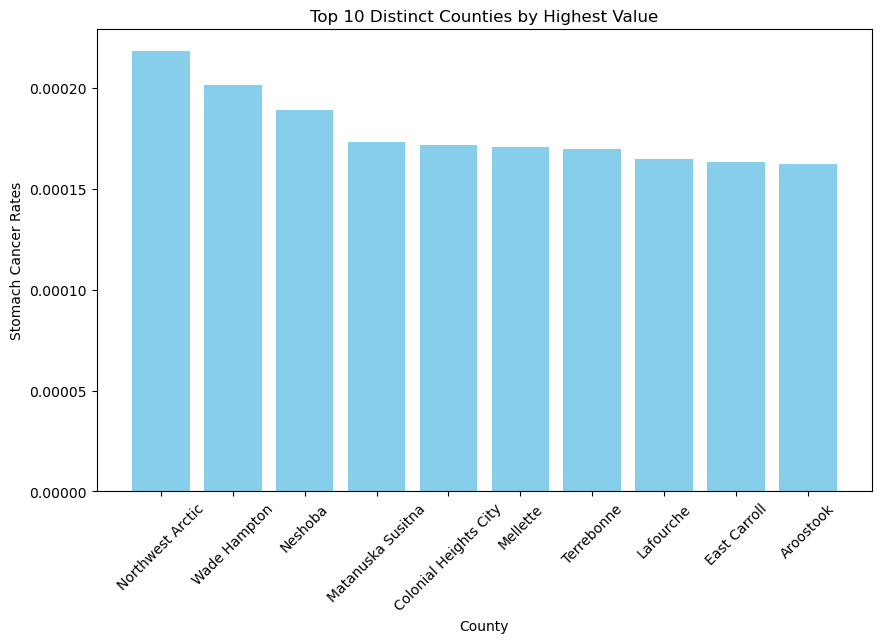

In [185]:
# lets see which counties have the highest avg stomach cancer rate

# group by 'county' and get the mean 'target' for each county
grouped = df.groupby('County Name')['target'].mean().reset_index()

# sort the df based on 'target' in descending order and get the top 10
top_10 = grouped.sort_values(by='target', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['County Name'].astype(str), top_10['target'], color='skyblue')
plt.title('Top 10 Distinct Counties by Highest Value')
plt.xlabel('County')
plt.ylabel('Stomach Cancer Rates')
plt.xticks(rotation=45)  # rotate the x labels for better readability
plt.show()

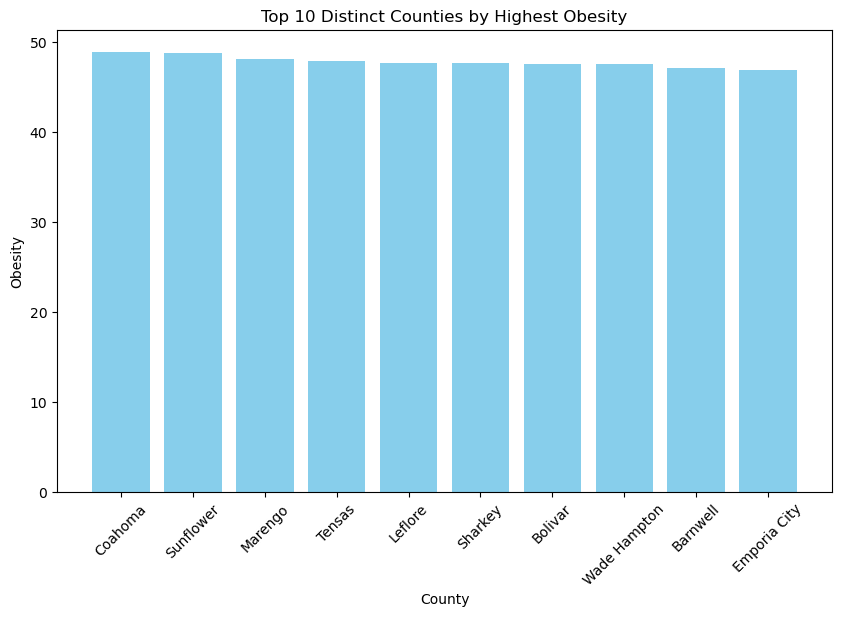

In [186]:
# lets see which counties have the avg highest obesity

# group by 'county' and get the mean 'obesity' for each county
grouped = df.groupby('County Name')['Obesity'].mean().reset_index()

# sort the df based on 'Obesity' in descending order and get the top 10
top_10 = grouped.sort_values(by='Obesity', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['County Name'].astype(str), top_10['Obesity'], color='skyblue')
plt.title('Top 10 Distinct Counties by Highest Obesity')
plt.xlabel('County')
plt.ylabel('Obesity')
plt.xticks(rotation=45)  # rotate the x labels for better readability
plt.show()

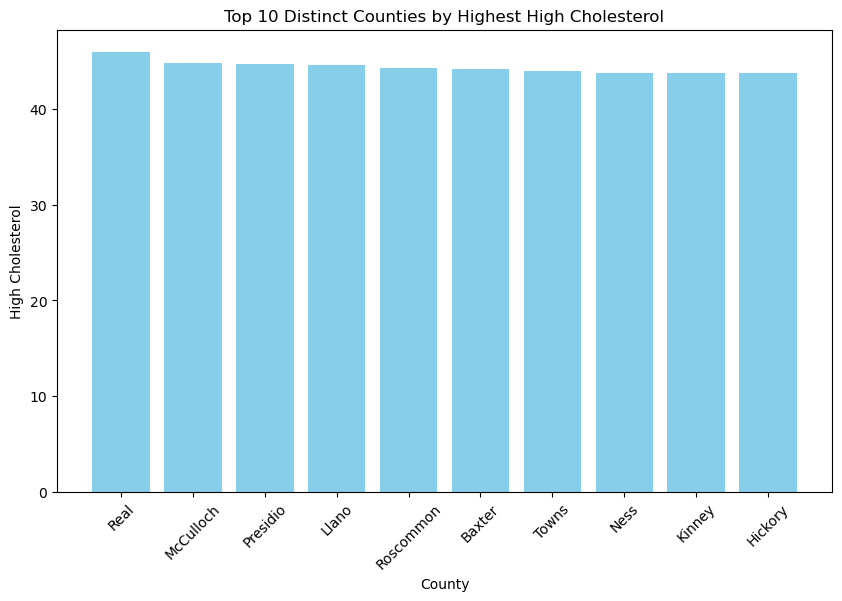

In [188]:
# lets see which counties have the highest avg Cholesterol

# group by 'county' and get the mean 'High Cholesterol' for each county
grouped = df.groupby('County Name')['High Cholesterol'].mean().reset_index()

# sort the df based on 'High Cholesterol' in descending order and get the top 10
top_10 = grouped.sort_values(by='High Cholesterol', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['County Name'].astype(str), top_10['High Cholesterol'], color='skyblue')
plt.title('Top 10 Distinct Counties by Highest High Cholesterol')
plt.xlabel('County')
plt.ylabel('High Cholesterol')
plt.xticks(rotation=45)  # rotate the x labels for better readability
plt.show()

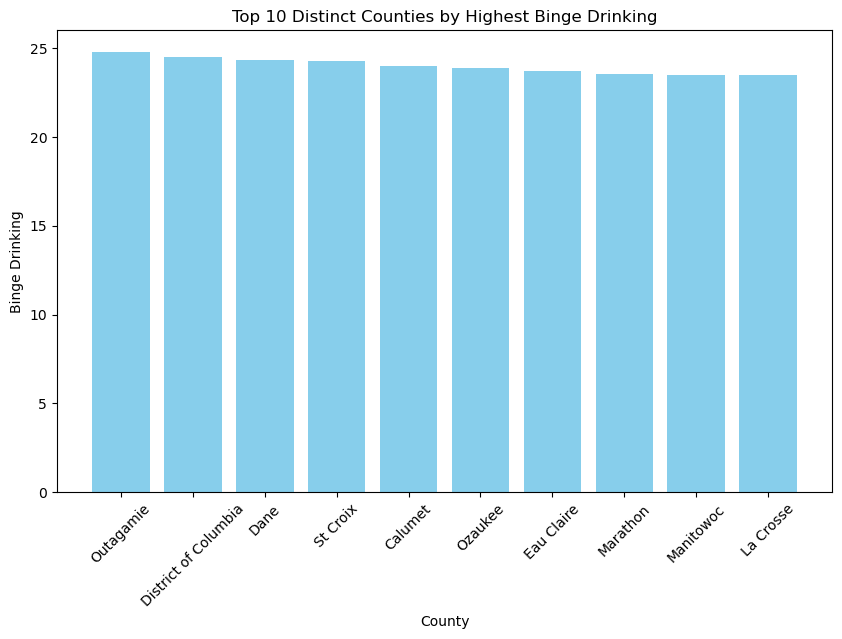

In [189]:
# lets see which counties have the highest avg Binge Drinking

# group by 'county' and get the mean 'Binge Drinking' for each county
grouped = df.groupby('County Name')['Binge Drinking'].mean().reset_index()

# sort the df based on 'Binge Drinking' in descending order and get the top 10
top_10 = grouped.sort_values(by='Binge Drinking', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['County Name'].astype(str), top_10['Binge Drinking'], color='skyblue')
plt.title('Top 10 Distinct Counties by Highest Binge Drinking')
plt.xlabel('County')
plt.ylabel('Binge Drinking')
plt.xticks(rotation=45)  # rotate the x labels for better readability
plt.show()

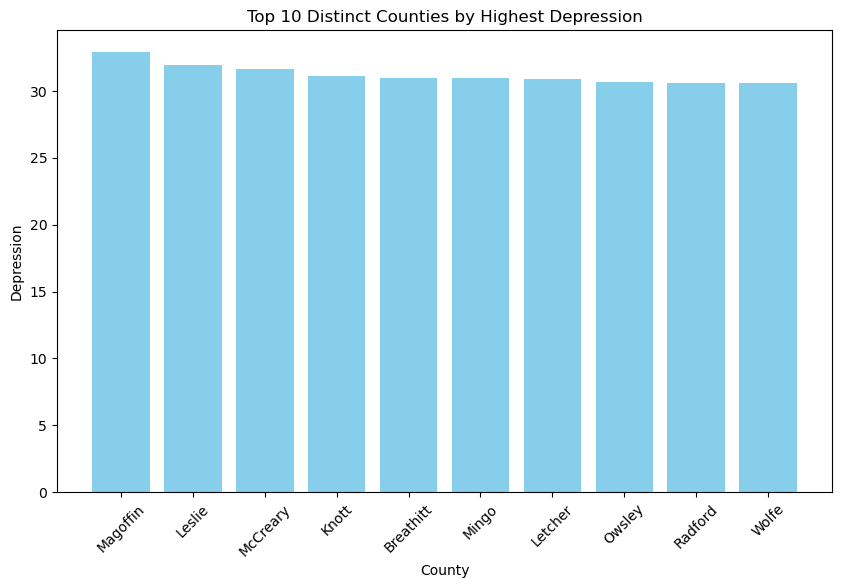

In [190]:
# lets see which counties have the highest avg Depression

# group by 'county' and get the mean 'Depression' for each county
grouped = df.groupby('County Name')['Depression'].mean().reset_index()

# sort the df based on 'Depression' in descending order and get the top 10
top_10 = grouped.sort_values(by='Depression', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['County Name'].astype(str), top_10['Depression'], color='skyblue')
plt.title('Top 10 Distinct Counties by Highest Depression')
plt.xlabel('County')
plt.ylabel('Depression')
plt.xticks(rotation=45)  # rotate the x labels for better readability
plt.show()

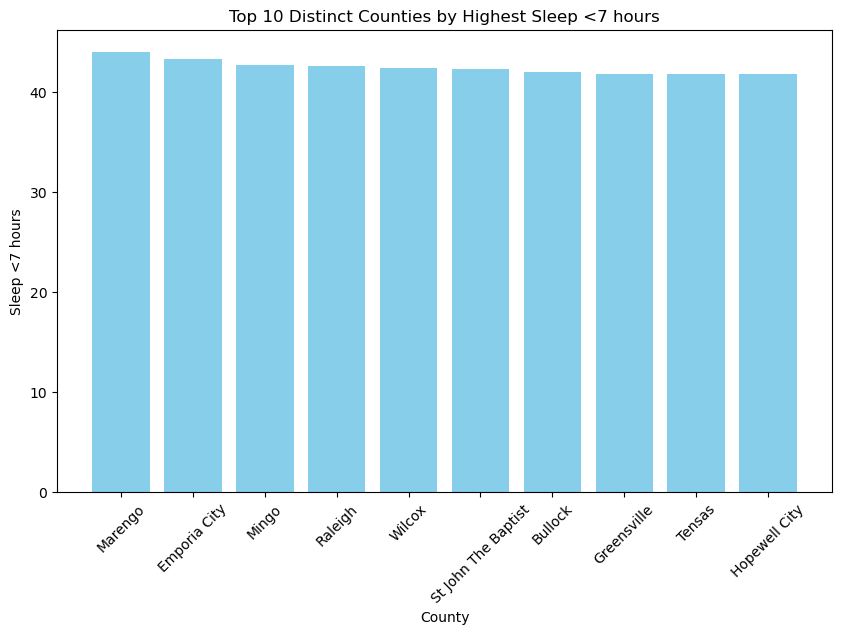

In [191]:
# lets see which counties have the highest avg Sleep <7 hours

# group by 'county' and get the mean 'Sleep <7 hours' for each county
grouped = df.groupby('County Name')['Sleep <7 hours'].mean().reset_index()

# sort the df based on 'Sleep <7 hours' in descending order and get the top 10
top_10 = grouped.sort_values(by='Sleep <7 hours', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['County Name'].astype(str), top_10['Sleep <7 hours'], color='skyblue')
plt.title('Top 10 Distinct Counties by Highest Sleep <7 hours')
plt.xlabel('County')
plt.ylabel('Sleep <7 hours')
plt.xticks(rotation=45)  # rotate the x labels for better readability
plt.show()

# Modeling